<a href="https://colab.research.google.com/github/skylex141/KaggleChalange/blob/master/Titanic_Kaggle_Chalange.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Desafio Titanic Kaggle

## Pacotes

In [28]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
plt.rc('figure', figsize = (14, 6))

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Datasets de teste e treinamento

In [29]:
y_test = pd.read_csv('gender_submission.csv')
x_test = pd.read_csv('test.csv')
x_train = pd.read_csv('train.csv')

In [30]:
y_train = x_train[['Survived','PassengerId']]
x_train = x_train.drop(['Survived'], axis = 1)

In [31]:
y_test.head() #Cabeçalho dos Sobreviventes

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


## Analises de Dados

In [32]:
x_train.shape

(891, 11)

In [33]:
x_train.describe().round(2)

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.00,891.00,714.00,891.00,891.00,891.00
mean,446.00,2.31,29.70,0.52,0.38,32.20
std,257.35,0.84,14.53,1.10,0.81,49.69
min,1.00,1.00,0.42,0.00,0.00,0.00
25%,223.50,2.00,20.12,0.00,0.00,7.91
50%,446.00,3.00,28.00,0.00,0.00,14.45
75%,668.50,3.00,38.00,1.00,0.00,31.00
max,891.00,3.00,80.00,8.00,6.00,512.33


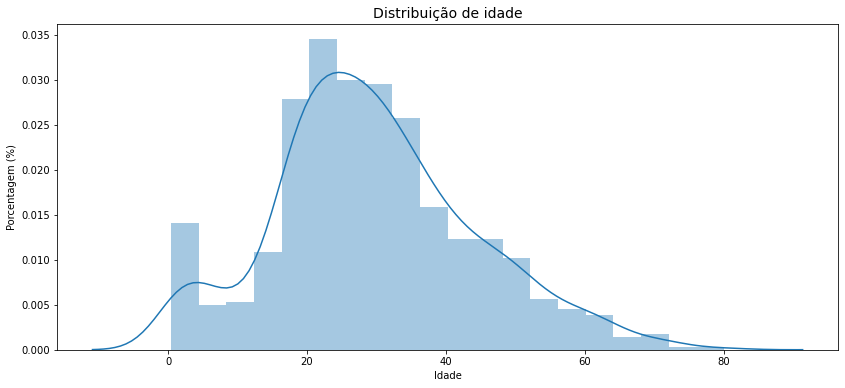

In [34]:
ax = sns.distplot(x_train['Age']);
ax.set_title('Distribuição de idade', fontsize = 14)

ax.set_ylabel('Porcentagem (%)')
ax.set_xlabel('Idade')

ax;

## Limpando os dados

In [35]:
x_train  = x_train .set_index('PassengerId')
x_test  = x_test.set_index('PassengerId')
y_train = y_train.set_index('PassengerId')
y_test = y_test.set_index('PassengerId')

In [36]:
x_train.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [37]:
x_train['Age'] = x_train['Age'].fillna(x_train['Age'].mean()).astype('int')
x_test['Age'] = x_test['Age'].fillna(x_test['Age'].mean()).astype('int')

x_train = x_train.drop(['Name','Ticket', 'Cabin'],axis=1)
x_test = x_test.drop(['Name','Ticket', 'Cabin'],axis=1)

x_train['Sex']= x_train['Sex'].map(lambda x: 0 if x == 'female' else 1)
x_test['Sex']=x_test['Sex'].map(lambda x: 0 if x == 'female' else 1)

x_test['Fare'] = x_test['Fare'].fillna(x_test['Fare'].mean())

x_train['Embarked'] = x_train['Embarked'].map(lambda x: 1 if x == 'S' else 2 if x == 'C' else 3)
x_test['Embarked'] = x_test['Embarked'].map(lambda x: 1 if x == 'S' else 2 if x == 'C' else 3)

In [38]:
print(x_train.info(), '\n\n')
print(y_train.info(), '\n\n')
print(x_test.info(), '\n\n')
print(y_test.info(), '\n\n')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    int64  
 2   Age       891 non-null    int32  
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  891 non-null    int64  
dtypes: float64(1), int32(1), int64(5)
memory usage: 52.2 KB
None 


<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Survived  891 non-null    int64
dtypes: int64(1)
memory usage: 13.9 KB
None 


<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null  

## ML

In [39]:
from sklearn.metrics import f1_score
models = []

### GridSearch com Ramdom Forest

In [40]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

parameter_space = {
    'criterion': ['gini','entropy'],
    'max_features':[None,'auto','sqrt','log2'],
    'max_leaf_nodes':[None,10,20,30,40,50],
    'n_estimators': [100, 200,300,400,500],
    'class_weight':[None, 'balanced','balanced_subsample']
}
clf = GridSearchCV(rf, parameter_space, n_jobs=-1, cv=3)
clf.fit(x_train, y_train)

# Best paramete set
print('Best parameters found:\n', clf.best_params_)

Best parameters found:
 {'class_weight': None, 'criterion': 'gini', 'max_features': None, 'max_leaf_nodes': 50, 'n_estimators': 300}


In [41]:
rf = RandomForestClassifier(class_weight= None,
                            criterion='gini',
                            max_features=None,
                            max_leaf_nodes = 30,
                            n_estimators = 100)

rf.fit(x_train, y_train)
models.append(('Random Forest Classifier', rf))
print('F1 score Train:',f1_score(y_train, rf.predict(x_train)))

F1 score Train: 0.8611544461778471
F1 score Train: 0.8611544461778471


### GridSearch com Decission Three

In [42]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
parameter_space = {
    'criterion': ['gini','entropy'],
    'splitter':['best', 'random'],
    'max_features':[None,'auto','sqrt','log2'],
    'max_leaf_nodes':[None,3,2,1,20,300,400,500],
    'class_weight':[None, 'balanced','balanced_subsample']
}
clf = GridSearchCV(dt, parameter_space, n_jobs=-1, cv=3)
clf.fit(x_train, y_train)

# Best paramete set
print('Best parameters found:\n', clf.best_params_)

Best parameters found:
 {'class_weight': None, 'criterion': 'gini', 'max_features': None, 'max_leaf_nodes': 20, 'splitter': 'best'}


In [43]:
dt = DecisionTreeClassifier(class_weight=None, criterion ='gini', max_features=None, max_leaf_nodes =20, splitter='best')
models.append(('Decision Tree Classifier', dt))

In [44]:
dt.fit(x_train, y_train)
print('F1 score Train:',f1_score(y_train, dt.predict(x_train)))

F1 score Train: 0.8033057851239669


### GridSearch com Logistc Regresion

In [45]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(x_train, y_train)
print('F1 score Train:',f1_score(y_train, lr.predict(x_train)))

models.append(('Logisti Regression Classifier', lr))

F1 score Train: 0.7376311844077961


## Models and acuracy

In [47]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
seed = 7

#Stratified kfold
kfold = StratifiedKFold(n_splits=10, random_state=seed)

#evaluation of each model in stratification sampling
print('\nAverage performance of the models:')
print('Model\t\t\t\tAccuracy Mean\t\tStandard deviation')
for name, model in models:
	cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s:\t%f\t(%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)


Average performance of the models:
Model				Accuracy Mean		Standard deviation
Random Forest Classifier:		0.834007	(0.058896)
Decision Tree Classifier:		0.804844	(0.055942)
Logisti Regression:		0.796866	(0.020888)


## Mensurando modelo de Teste

In [59]:
from sklearn.metrics import accuracy_score
print('Testando a acuracia do modelo de Random Forest: ',accuracy_score(rf.predict(x_test), y_test))
print('Testando a acuracia do modelo de Decision Three: ',accuracy_score(dt.predict(x_test), y_test))
print('Testando a acuracia do modelo de logistc regression: ',accuracy_score(lr.predict(x_test), y_test))

Testando a acuracia do modelo de Random Forest:  0.8636363636363636
Testando a acuracia do modelo de Decision Three:  0.8588516746411483
Testando a acuracia do modelo de logistc regression:  0.9401913875598086
